Predict the price of a car given its compression ratio.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [60]:
data=pd.read_csv('green_tripdata_2018-12.csv')

In [61]:
data.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-12-01 00:23:25,2018-12-01 00:24:47,N,1,193,193,1,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2,1.0
1,2,2018-11-30 23:58:31,2018-12-01 00:21:53,N,1,80,82,2,5.75,21.0,0.5,0.5,0.00,0.0,NaN,0.3,22.30,2,1.0
2,2,2018-12-01 00:21:03,2018-12-01 00:30:15,N,1,225,225,1,1.55,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0
3,2,2018-12-01 00:15:56,2018-12-01 00:23:26,N,1,75,236,2,1.32,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,1,1.0
4,2,2018-12-01 00:28:32,2018-12-01 00:30:33,N,1,75,75,2,0.68,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685373 entries, 0 to 685372
Data columns (total 19 columns):
VendorID                 685373 non-null int64
lpep_pickup_datetime     685373 non-null object
lpep_dropoff_datetime    685373 non-null object
store_and_fwd_flag       685373 non-null object
RatecodeID               685373 non-null int64
PULocationID             685373 non-null int64
DOLocationID             685373 non-null int64
passenger_count          685373 non-null int64
trip_distance            685373 non-null float64
fare_amount              685373 non-null float64
extra                    685373 non-null float64
mta_tax                  685373 non-null float64
tip_amount               685373 non-null float64
tolls_amount             685373 non-null float64
ehail_fee                0 non-null float64
improvement_surcharge    685373 non-null float64
total_amount             685373 non-null float64
payment_type             685373 non-null int64
trip_type                68

In [21]:
data[data['fare_amount'] < 0]['fare_amount'].count()

2029

In [16]:
#data['fare_amount']=data['fare_amount'].apply(lambda X:0 if X< 0 else X)

In [23]:
df=data[data['fare_amount'] > 0]

In [27]:
df[df['fare_amount'] > 0]['fare_amount'].count()

681998

In [28]:
X=df[['trip_distance']]
y=df[['fare_amount']]

In [29]:
X.describe()

,trip_distance
count,681998.000000
mean,3.448731
std,4.035843
min,0.000000
25%,1.080000
50%,1.990000
75%,4.070000
max,105.130000


In [30]:
y.describe()

,fare_amount
count,681998.00000
mean,14.20799
std,12.24784
min,0.01000
25%,6.50000
50%,10.00000
75%,17.00000
max,500.00000


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.10,random_state=40)

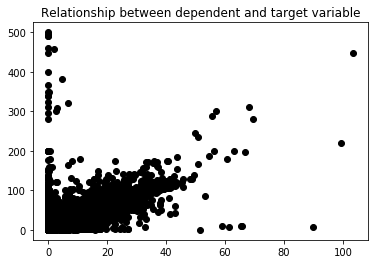

In [32]:
plt.title('Relationship between dependent and target variable')
plt.scatter(X_train, y_train,  color='black')
plt.show()

In [39]:
## model building
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
## Model Parameters

from sklearn.metrics import mean_squared_error, r2_score

model_score = lm.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R sq: ',model_score)

y_predicted = lm.predict(X_test)

R sq:  0.8586395688742755


In [42]:
# The coefficients
print('Coefficients: ', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predicted))

Coefficients:  [[2.81781264]]
Mean squared error: 16.86
Variance score: 0.88


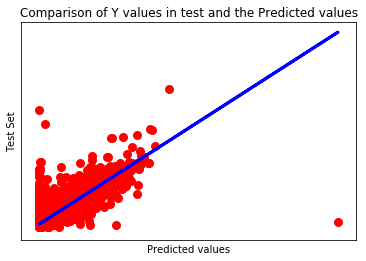

In [45]:
## Accuracy report with test data

y_predicted = lm.predict(X_test)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(X_test, y_predicted, color='blue', linewidth=3)
plt.scatter(X_test, y_test, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [58]:
y_pred=pd.DataFrame(data=y_predicted,columns=['Predicted'])
id = pd.DataFrame(data=X_test.index.values,columns=['ID'])
output=pd.concat([id,y_pred],axis=1)
output.to_csv('CaseStudy1_4_session19.csv',index=False)




